In [2]:

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
        

In [3]:
from thinkdsp import*
from thinkdsp import decorate as dec


In [4]:
signal = TriangleSignal(500)
signal2=SinSignal(freq=400,amp=1,offset=0.3)
signal3=CosSignal(freq=2000,amp=1,offset=0.3)
sum=signal
#wave=sum.make_wave(duration=0.5,start=0,framerate=6000)
wave.make_audio()


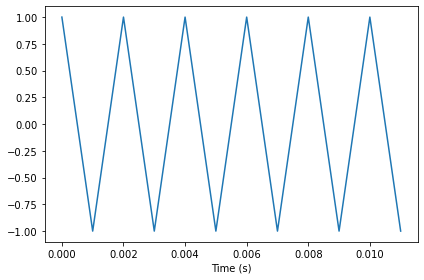

In [16]:
duration = sum.period*6
segment = sum.make_wave(duration, framerate=1000)
segment.plot()
decorate(xlabel='Time (s)')

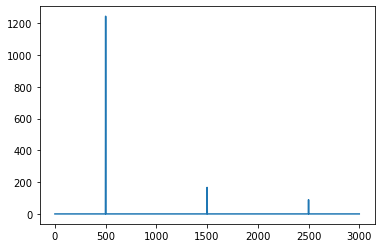

In [17]:
spectrum=wave.make_spectrum()
spectrum.plot()

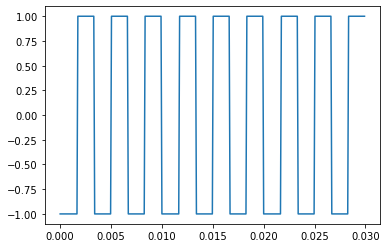

In [18]:
square=SquareSignal(300)
waveS=square.make_wave(duration=0.6,start=0,framerate=11500)
waveS.make_audio()
segment=waveS.segment(start=0,duration=0.03)
segment.plot()

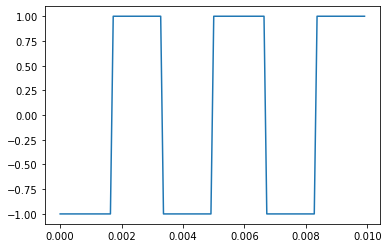

In [19]:
signalS=SinSignal(5500)
signalC=CosSignal(4500)
duration = signal.period*5

segment=square.make_wave(duration,framerate=11000)
segment.plot()

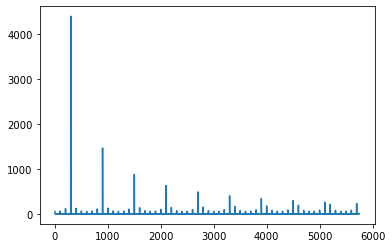

In [20]:
spectrum = waveS.make_spectrum()
spectrum.plot()

In [21]:
spectrum.make_wave().make_audio()

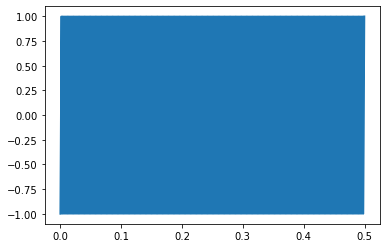

In [22]:
signalSaw=SawtoothSignal(500)
wavSaw=signalSaw.make_wave(duration=0.5,framerate=10500)
wavSaw.plot()

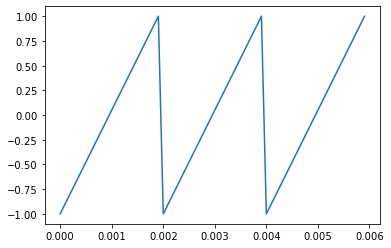

In [23]:
segment=wavSaw.segment(start=0, duration=signalSaw.period*3)
segment.plot()

In [24]:
segment.make_audio()

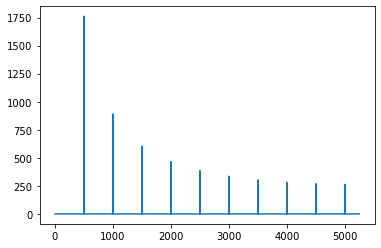

In [25]:
spectrum=wavSaw.make_spectrum()
spectrum.plot()

In [26]:
spectrum.make_wave().make_audio()

In [27]:
import numpy as np

hs = np.fft.rfft(wavSaw.ys)
hs

array([ 4.66027217e-13+0.00000000e+00j,  1.17347350e-13-1.66898583e-16j,
        1.23986576e-13-1.15855079e-13j, ...,
        3.01568810e-14+4.66826519e-14j, -3.83139788e-14-2.14308359e-13j,
        4.55635529e-14+0.00000000e+00j])

In [28]:
n = len(wavSaw.ys)                 # number of samples
d = 1 / wave.framerate           # time between samples
fs = np.fft.rfftfreq(n, d)
fs

array([0.00000000e+00, 1.14285714e+00, 2.28571429e+00, ...,
       2.99771429e+03, 2.99885714e+03, 3.00000000e+03])

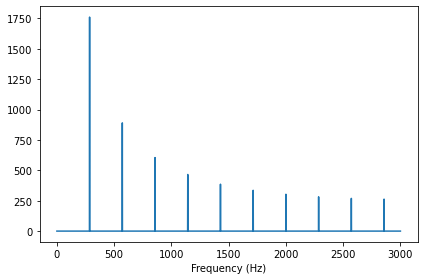

In [29]:
import matplotlib.pyplot as plt

magnitude = np.absolute(hs)
plt.plot(fs, magnitude)
decorate(xlabel='Frequency (Hz)')

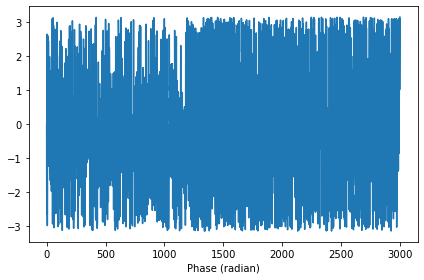

In [44]:
angle = np.angle(hs)
plt.plot(fs, angle)
decorate(xlabel='Phase (radian)')

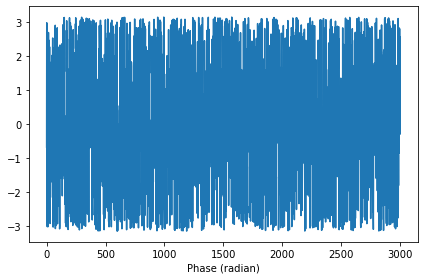

In [45]:
import random
random.shuffle(angle)
plt.plot(fs, angle)
decorate(xlabel='Phase (radian)')

In [47]:
i = complex(0, 1)
spectrum = wavSaw.make_spectrum()
spectrum.hs = magnitude * np.exp(i * angle)

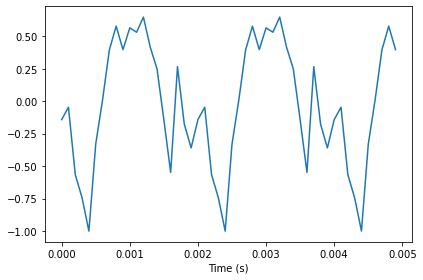

In [48]:
wave2 = spectrum.make_wave()
wave2.normalize()
segment = wave2.segment(duration=0.005)
segment.plot()
decorate(xlabel='Time (s)')

In [49]:
wave2.make_audio()

In [50]:
wavSaw.make_audio()